<a href="https://colab.research.google.com/github/2303A52164/Generative_ai_2025/blob/main/Generative_AI_2303A52164_Week_No__7_Assignment_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Assignment - 7.3**

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
data_path = "/content/Housing (1).csv"
df = pd.read_csv(data_path)

In [25]:
# Assuming these are your categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

In [26]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [27]:
X = df.drop('price', axis=1)
Y = df['price']

In [13]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# Now apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Build ANN model
model = Sequential([
    Dense(12, activation='swish', input_shape=(X_train.shape[1],)),
    Dense(25, activation='swish'),
    Dense(15, activation='swish'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile model
model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Train model
history = model.fit(X_train, Y_train, epochs=300, batch_size=16, validation_data=(X_test, Y_test))


Epoch 1/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0000e+00 - loss: 140725.8125 - val_accuracy: 0.0000e+00 - val_loss: -144367.7656
Epoch 2/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: -304826.5000 - val_accuracy: 0.0000e+00 - val_loss: -417142.0312
Epoch 3/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -473209.7188 - val_accuracy: 0.0000e+00 - val_loss: -635609.2500
Epoch 4/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -765304.0000 - val_accuracy: 0.0000e+00 - val_loss: -825433.1875
Epoch 5/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -880960.6250 - val_accuracy: 0.0000e+00 - val_loss: -1001243.6250
Epoch 6/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -1148921.1250 - val_accuracy: 0.0000e+00 - val_loss: -1168830.3750
Epoch 7/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -1094953.0000 - val_accuracy: 0.

In [39]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: -299116928.0000
Test Accuracy: 0.0000


In [40]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


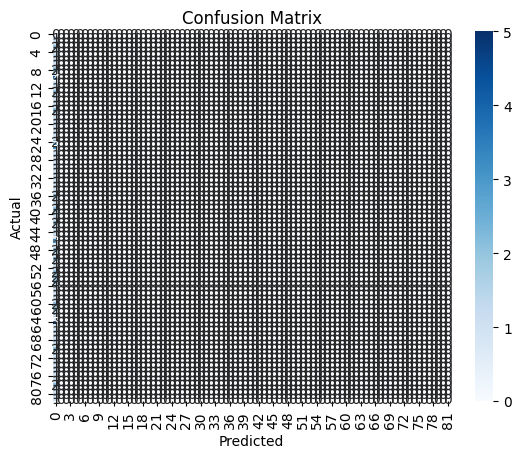

In [41]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Classification Report
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
     1750000       0.00      0.00      0.00       1.0
     1820000       0.00      0.00      0.00       1.0
     1890000       0.00      0.00      0.00       2.0
     2100000       0.00      0.00      0.00       1.0
     2233000       0.00      0.00      0.00       1.0
     2275000       0.00      0.00      0.00       1.0
     2380000       0.00      0.00      0.00       1.0
     2450000       0.00      0.00      0.00       2.0
     2520000       0.00      0.00      0.00       1.0
     2660000       0.00      0.00      0.00       4.0
     2800000       0.00      0.00      0.00       1.0
     2870000       0.00      0.00      0.00       1.0
     2940000       0.00      0.00      0.00       2.0
     3003000       0.00      0.00      0.00       1.0
     3010000       0.00      0.00      0.00       1.0
     3045000       0.00      0.00      0.00       1.0
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [43]:
# Load and deploy saved model
loaded_model = load_model("diabetes_model.h5")
def predict_diabetes(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = (loaded_model.predict(input_scaled) > 0.5).astype(int)
    return "Diabetic" if prediction == 1 else "Non-Diabetic"

In [45]:
# Example deployment usage
sample_data = X_test[0]  # Use any sample data for testing
print("Prediction:", predict_diabetes(sample_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Diabetic
